# Potentials

In this Notebook you can find the different Potentials, that are already implemented and can be used for your projects. Play around with the parameters to get familiar with the Potentials


Here you also can find classical Potentials like the harmonic Oscillator or the Lennard Jones Potential.


In [26]:
import os, sys
path = "../"
sys.path.append(path)


import numpy as np
from matplotlib import pyplot as plt

#Ensembler
from ensembler.potentials import OneD as potentials1D
from ensembler.potentials import TwoD as potentials2D

#Plotting:
import ensembler.visualisation.plotPotentials as vis

#params
test_timing_with_points =100

In [27]:
import numpy as np
from ensembler.potentials import OneD as potentials1D
import ensembler.visualisation.plotPotentials as vis

In [2]:
os.getcwd()

'c:\\Users\\benja\\OneDrive - ETH Zürich\\PhD\\Code\\ensembler_public\\examples'

## Classics

### Harmonic Oscillator

The Harmonic Oscillator is one of the most used modelling potentials1D. Its based on hooke's law and can be used to describe obviously springs, but also covalent bonds of two atoms and many more physical relations.


Functional:

$V =  \frac{1}{2}*k*(r - r_0)^2+V_{offset} $

with:
* $k$ force constant
* $r_0$ optimal position (optimal covalent bond length)
* $r$ current position (current bond length)
* $V_{offset}$ minimal potential energy offset

first partial deviation by r

$\frac{\partial V}{\partial r} = k*(r - r_0) $



#### 1D

calculate 100 positions: 
Wall time: 0 ns

Visualization


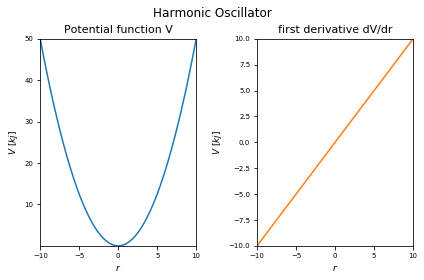

In [19]:
# 1D
positions = np.linspace(-10,10, test_timing_with_points)

V = potentials1D.harmonicOscillatorPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

#fig.savefig("harmonic_Oscillator.png")

#### 2D

calculate 100 positions: 
Wall time: 1.82 ms

Visualization


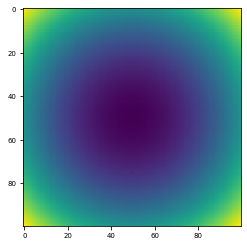

In [20]:
# 2D
positions = np.linspace(-4, 4, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

V = potentials2D.harmonicOscillatorPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions2D)


print("\nVisualization")
plt.imshow(V.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))

### Double Well Potential
The double well is a very nice potential.

Functional:

$V = \frac{V_{max}}{b^4}*((-\frac{a}{2} + r)^2-b^2)^2$


first order derivative

$\frac{\partial V}{\partial r} = \frac{V_max}{b^4}*(-2a + 4r)*((-a/2 + r)^2-b^2) $

calculate 100 positions: 
Wall time: 0 ns

Visualization


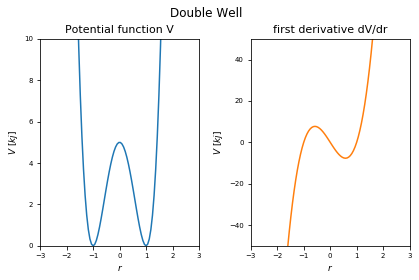

In [35]:
positions = np.linspace(-3, 3, test_timing_with_points)

V = potentials1D.doubleWellPotential(a=0, b=1, Vmax=5)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-50,50])
fig.axes[0].set_ylim([0,10])
fig.savefig("double_well.png")

pass

# Four Well Potential

In [2]:
#phase space
positions = np.linspace(0, 10, test_timing_with_points)

#build potential
V = potentials1D.fourWellPotential(a=1,b=4, c=6, d=8)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization") #visualize
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)
#fig.savefig("four_well.png")

pass

NameError: name 'np' is not defined

In [3]:
import numpy as np
from ensembler.potentials import OneD as potentials1D
from ensembler.visualisation import plotPotentials

#phase space
positions = np.linspace(start=0, stop=10, num=1000)

#build potential
V = potentials1D.fourWellPotential(a=1,b=4, c=6, d=8)

#visualize
fig, axes = plotPotentials.plot_1DPotential_Term(V, positions=positions)
fig.savefig("four_well.png")


ModuleNotFoundError: No module named 'ensembler'

### Wave Potential

Functional: 

$A*cos(m*(r + w)) + V_{off}$

first derivative:

$\frac{\partial V}{\partial r} = -A*m*sin(m*(r + w)) $

In [4]:
#1D
positions = np.linspace(0, 4, test_timing_with_points)

V = potentials1D.wavePotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

NameError: name 'test_timing_with_points' is not defined

In [5]:
#2D
positions = np.linspace(-180, 180, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

V = potentials2D.wavePotential(multiplicity=[2,2], degree=True)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions2D)


print("\nVisualization")
plt.imshow(V.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))

NameError: name 'test_timing_with_points' is not defined

### Torsion Potential

In [6]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.wavePotential(multiplicity=3)
w2 = potentials1D.wavePotential()
waves = [w1, w2]

V = potentials1D.torsionPotential(wavePotentials=waves)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)


NameError: name 'test_timing_with_points' is not defined

### Lennard Jones Potential

Functional: 

$V = 4e*(\frac{s^{12}}{(r - r_0)^12} - \frac{s^6}{(r - r_0)^6}) +  V_{off}$

first derivative:

$\frac{\partial V}{\partial r} = 4e*(-12*\frac{s^{12}}{(r - r_0)^13} + 6*\frac{s^6}{(r - r_0)^7})$


In [7]:
positions = np.linspace(0.1, 5, test_timing_with_points)

V = potentials1D.LennardJonesPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)
axes[0].set_ylim([-5, 10])
axes[1].set_ylim([-5, 10])
pass

NameError: name 'test_timing_with_points' is not defined

### Culomb Potential


Functional: 

$V = \frac{q_1q_2}{(4 \pi \epsilon r)}$

first derivative:

$\frac{\partial V}{\partial r} = \frac{-q_1q_2}{(4\pi \epsilon r^2)}$



In [8]:
positions = np.linspace(0.1, 5, test_timing_with_points)

V = potentials1D.coulombPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

NameError: name 'test_timing_with_points' is not defined

# Perturbed/MultiState Potentials

## linear coupled

Functional:

$V(r, \lambda) = \lambda V_a(r) + (1-\lambda) V_b(r)$


first order derivatives:


$\frac{\partial V}{\partial \lambda} = $

$\frac{\partial V}{\partial r} = $


In [9]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillator()
w2 = potentials1D.harmonicOscillator(k=11)

V = potentials1D.linearCoupledPotentials(Va=w1, Vb=w2)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)


NameError: name 'test_timing_with_points' is not defined

In [10]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(k=10, x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(k=10, x_shift=2)


w1 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=2)
V = potentials1D.linearCoupledPotentials(Va=w1, Vb=w2)

lambda_ene = []
for lam in np.arange(0, 1, 0.01):
    V.set_lam(lam)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=50)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


NameError: name 'test_timing_with_points' is not defined

# exponential Copuled - Enveloping Potential


Used in EDS

Functional:

$V(r) = -\frac{1}{k_b T s} ln(e^{- k_b T s (V_i-E^{off}_i)}+e^{-k_b T s (V_j-E^{off}_j)})$ 



In [11]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(x_shift=2)

#print(w1, w2)
V = potentials1D.exponentialCoupledPotentials(Va=w1, Vb=w2, s=1, eoffA=0, eoffB=0)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)
plt.show()
plt.close()
plt.plot(positions, V.ene(positions))
plt.plot(positions, w1.ene(positions))
plt.plot(positions, w2.ene(positions))


plt.ylim([0,2])


NameError: name 'test_timing_with_points' is not defined

# linear & exponential hybrid Copuled - $\lambda$ EDS

Functional:

$V(r) = -\frac{1}{k_b T s} ln(\lambda e^{- k_b T s (V_i-E^{off}_i)}+(1-\lambda)e^{-k_b T s (V_j-E^{off}_j)})$ 



In [12]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(x_shift=2)

V = potentials1D.hybridCoupledPotentials(Va=w1, Vb=w2, lam=0)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

#perturbed potentilas


NameError: name 'test_timing_with_points' is not defined

In [13]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=2)
V = potentials1D.hybridCoupledPotentials(Va=w1, Vb=w2, s=0.1)

#ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=3.0, x_shift=10.0), s=0.05, temp=300.0

lambda_ene = []
for lam in np.arange(0, 1.01, 0.01):
    V.set_lam(lam)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=10)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


NameError: name 'test_timing_with_points' is not defined

In [14]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=2)
V = potentials1D.hybridCoupledPotentials(Va=w1, Vb=w2, s=0.1)


points=50
lambda_ene = []
for lam, s in zip(np.linspace(0, 0.5, points), np.logspace(0, -3,  points)):
    V.set_lam(lam)
    V.set_s(s)
    lambda_ene.append(V.ene(positions))
for lam, s in zip(np.linspace(0.51, 1,  points), np.logspace(-3, 0,  points)):
    V.set_lam(lam)
    V.set_s(s)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=30)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


NameError: name 'test_timing_with_points' is not defined

In [15]:
# Special Potential

The Gerhard Koenich Memorial

SyntaxError: invalid syntax (<ipython-input-15-70dc21314b60>, line 3)

In [16]:
## dummy Potential

This potential returns always the same value independt on its position.

Functional:
$V(r)=x$


SyntaxError: invalid syntax (<ipython-input-16-583d0bf56eca>, line 3)

In [17]:
positions = np.linspace(1,100, test_timing_with_points)

V = potentials1D.dummyPotential()

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

NameError: name 'test_timing_with_points' is not defined

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials1D.flatwellPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])

In [18]:
positions = np.linspace(1,100, test_timing_with_points)

V = potentials.dummyPotential()

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

NameError: name 'test_timing_with_points' is not defined

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

In [19]:
positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials.flatwellPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])

NameError: name 'test_timing_with_points' is not defined

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

In [20]:
positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials.flatwellPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])

NameError: name 'test_timing_with_points' is not defined

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

In [21]:
positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials.flatwellPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])

NameError: name 'test_timing_with_points' is not defined

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

In [22]:
positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials.flatwellPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])

NameError: name 'test_timing_with_points' is not defined

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

In [23]:
positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials.flatwellPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])

NameError: name 'test_timing_with_points' is not defined

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

In [24]:
positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials.flatwellPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])

NameError: name 'test_timing_with_points' is not defined

calculate 100 positions: 
Wall time: 0 ns

Visualization


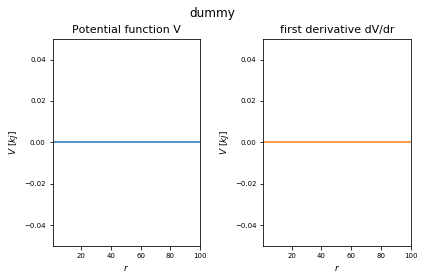

## Flatwell Potential

A potential return dependent on a position a value in a binary fashion

In [25]:
positions = sorted(list(np.linspace(-10,10, test_timing_with_points))+[1, 0])

V = potentials.flatwellPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions, y_range=[-3, 10])

NameError: name 'test_timing_with_points' is not defined